In [330]:
import pandas as pd
import numpy as np
df = pd.read_csv("summary.csv", encoding="utf_8_sig")
df.Price = df.Price.astype(int)
df.drop_duplicates(inplace=True)   #是否去重之前，品牌出现的频率，荣耀高

In [331]:
df.dtypes

Brands                 object
Model                  object
Price                   int32
money_off              object
discount               object
Internal Storage       object
Solid State Storage    object
Display                object
Shop                   object
Shop Type               int64
Video Memory           object
JingDong                int64
href                   object
used                    int64
Display_type            int64
Processor              object
Version                object
Touch control           int64
Screen size            object
Sale                   object
Favorable rate         object
dtype: object

In [332]:
df.Brands=df.Brands.replace('机械','机械革命')
df.Brands=df.Brands.replace('APPLE','Apple')
df['Solid State Storage']=df['Solid State Storage'].replace(['128G PCIeG+1T','128GB+1T','128GPCI-EG+1T'],'128G+1T')  
df['Solid State Storage']=df['Solid State Storage'].replace('128GG+2T','128G+2T')
df['Solid State Storage']=df['Solid State Storage'].replace(['128G+1T','128GG+1T'],'1152G')
df['Solid State Storage']=df['Solid State Storage'].replace('128G+2T','2176G')
df['Solid State Storage']=df['Solid State Storage'].replace('1T','1024G')
df['Solid State Storage']=df['Solid State Storage'].replace('2T','2048G')
df['Solid State Storage']=df['Solid State Storage'].replace('512G+32G','544G')
df.money_off=df.money_off.replace(' ','')
df.discount=df.discount.replace(' ','')
df.Sale=df.Sale.replace(' ',np.nan)
df['Favorable rate']=df['Favorable rate'].replace(' ',np.nan)
df.Brands=df.Brands.astype(str)
for index,brand in enumerate(df.Brands):
    if brand.isalpha()==True:
        df.iloc[index,0]=brand
    else:
        df.iloc[index,0]=np.nan



In [334]:
df=df.dropna(axis=0,subset=["Brands",'Sale','Favorable rate'])
df.Sale=df.Sale.astype(int)
df['Favorable rate']=df['Favorable rate'].astype(int)
df=df.drop_duplicates(['Brands','Model','Price','Internal Storage','Solid State Storage','Display','Shop','Display_type','Video Memory','Processor','Screen size','Sale'],keep='last')
df = df.reset_index(drop=True)


In [335]:
for index,money in enumerate(df.money_off):
    if money and df.Price[index]>=int(money) and df.discount[index]:
        df.iloc[index,2]=df.Price[index]-int(df.discount[index])

In [340]:
df_processor=df
df.Processor=df.Processor.replace(' ',np.nan)
df_inter_storage=df
df['Internal Storage']=df['Internal Storage'].replace('64G',np.nan)

In [343]:
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import sklearn

#导入数据
data = pd.read_csv(r"summary4.0.csv",header=None,names=['Brands','Model','Price','money_off','discount','Internal Storage','Solid State Storage','Display','Shop','Shop Type','Video Memory','JingDong','href','used','Display_type','Processor','Version','Touch control','Screen size','Sale','Favorable rate'])
df1=pd.DataFrame(data)
df1=df1[(df1['Internal Storage'].isnull()==False)&(df1['Processor'].isnull()==False)&(df1['Solid State Storage'].isnull()==False)]
df1['Internal Storage']=df1['Internal Storage'][1:].str[:-1].astype(int)
df1['Solid State Storage']=df1['Solid State Storage'][1:].str[:-1].astype(int)
df1=df1.reset_index(drop=True)
for index,i in enumerate(df1['Processor']):
    if i=='i3':
        df1['Processor'][index]=1
    elif i=='R3':
        df1['Processor'][index]=2
    elif i=='R5':
        df1['Processor'][index]=3
    elif i=='R7':
        df1['Processor'][index]=4
    elif i=='i7':
        df1['Processor'][index]=5
    elif i=='i5':
        df1['Processor'][index]=6
    elif i=='i9':
        df1['Processor'][index]=7
    elif i=='R9':
        df1['Processor'][index]=8
data=df1.iloc[1:,[2,5,6]]
labels=df1.iloc[1:,-6].astype(int)
clf = neighbors.KNeighborsClassifier(40, weights='distance')
iris_train_X , iris_test_X, iris_train_y ,iris_test_y = train_test_split(data,labels)
clf.fit(iris_train_X ,iris_train_y)

print(clf.score(iris_test_X,iris_test_y))
for i in range(df.shape[0]):
    if pd.isna(df.iloc[i,-6]) and not pd.isna(df.iloc[i,5]) and  not pd.isna(df.iloc[i,6]):
        df.iloc[i,-6]=clf.predict([[df.iloc[i,2],int(df.iloc[i,5][:-1]),int(df.iloc[i,6][:-1])]])


C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ThinkPad\scoop\apps\python37\3.7.4

0.562753036437247


In [344]:
df['Processor']=df['Processor'].replace([1,2,3,4,5,6,7,8],['i3','R3','R5','R7','i7','i5','i9','R9'])
processor_dict={1:'i3',2:'R3',3:'R5',4:'R7',5:'i7',6:'i5',7:'i9',8:'R9'}


In [345]:
data2 = pd.read_csv(r"summary4.0.csv",header=None,names=['Brands','Model','Price','money_off','discount','Internal Storage','Solid State Storage','Display','Shop','Shop Type','Video Memory','JingDong','href','used','Display_type','Processor','Version','Touch control','Screen size','Sale','Favorable rate'])
df2=pd.DataFrame(data2)
df2=df2[(df2['Internal Storage'].isnull()==False)&(df2['Processor'].isnull()==False)&(df2['Solid State Storage'].isnull()==False)]
df2['Internal Storage']=df2['Internal Storage'][1:].str[:-1].astype(int)
df2['Solid State Storage']=df2['Solid State Storage'][1:].str[:-1].astype(int)
df2=df2.reset_index(drop=True)
for index,i in enumerate(df2['Processor']):
    if i=='i3':
        df2['Processor'][index]=1
    elif i=='R3':
        df2['Processor'][index]=2
    elif i=='R5':
        df2['Processor'][index]=3
    elif i=='R7':
        df2['Processor'][index]=4
    elif i=='i7':
        df2['Processor'][index]=5
    elif i=='i5':
        df2['Processor'][index]=6
    elif i=='i9':
        df2['Processor'][index]=7
    elif i=='R9':
        df2['Processor'][index]=8
df['Processor']=df['Processor'].replace(['i3','R3','R5','R7','i7','i5','i9','R9'],[1,2,3,4,5,6,7,8])
data2=df2.iloc[1:,[2,6,-6]]
labels2=df2.iloc[1:,5]
iris_train_X , iris_test_X, iris_train_y ,iris_test_y = train_test_split(data2,labels2)
clf2 = neighbors.KNeighborsClassifier(24, weights='distance')
clf2.fit(iris_train_X,iris_train_y)

for i in range(df.shape[0]):
    if not pd.isna(df.iloc[i,-6]) and pd.isna(df.iloc[i,5]) and  not pd.isna(df.iloc[i,6]):
        df.iloc[i,5]=clf2.predict([[df.iloc[i,2],int(df.iloc[i,6][:-1]),int(df.iloc[i,-6])]])


C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import k

In [346]:
data3 = pd.read_csv(r"summary4.0.csv",header=None,names=['Brands','Model','Price','money_off','discount','Internal Storage','Solid State Storage','Display','Shop','Shop Type','Video Memory','JingDong','href','used','Display_type','Processor','Version','Touch control','Screen size','Sale','Favorable rate'])
df3=pd.DataFrame(data3)
df3=df3[df3['Processor'].isnull()==False]
df3=df3.reset_index(drop=True)
for index,i in enumerate(df3['Processor']):
    if i=='i3':
        df3['Processor'][index]=1
    elif i=='R3':
        df3['Processor'][index]=2
    elif i=='R5':
        df3['Processor'][index]=3
    elif i=='R7':
        df3['Processor'][index]=4
    elif i=='i7':
        df3['Processor'][index]=5
    elif i=='i5':
        df3['Processor'][index]=6
    elif i=='i9':
        df3['Processor'][index]=7
    elif i=='R9':
        df3['Processor'][index]=8
data3=df3.iloc[1:,[2]]
labels3=df3.iloc[1:,-6].astype(int)
iris_train_X , iris_test_X, iris_train_y ,iris_test_y = train_test_split(data3,labels3)
clf3 = neighbors.KNeighborsClassifier(60, weights='distance')
clf3.fit(iris_train_X,iris_train_y)
print(clf3.score(iris_test_X,iris_test_y))
for i in range(df.shape[0]):
    if pd.isna(df.iloc[i,-6]):
        df.iloc[i,-6]=clf3.predict([[df.iloc[i,2]]])

0.5315985130111525


In [368]:
df['Processor']=df['Processor'].replace([1,2,3,4,5,6,7,8],['i3','R3','R5','R7','i7','i5','i9','R9'])

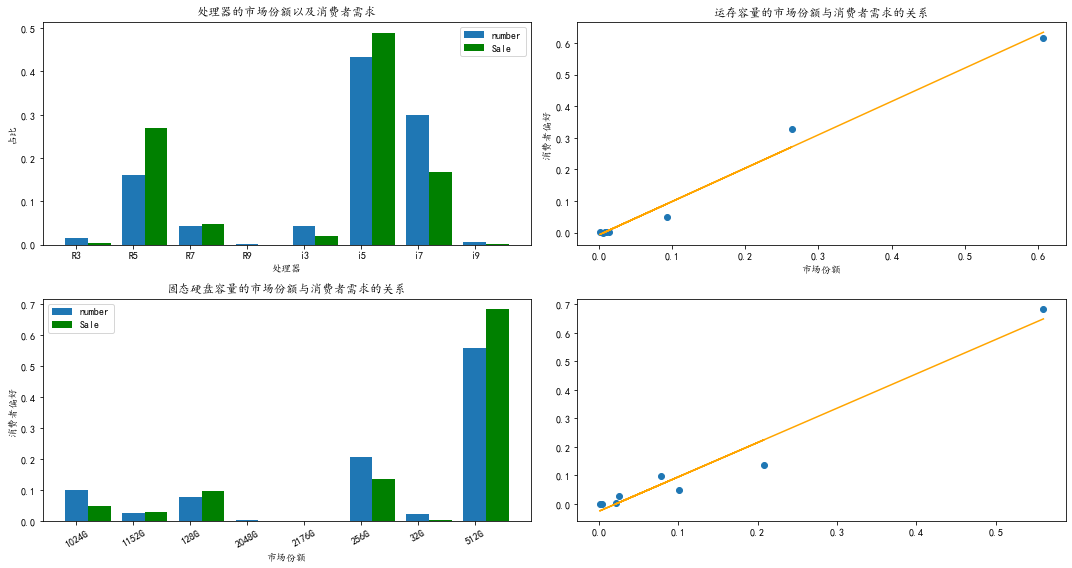

In [370]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['KaiTi']
fig,axs=plt.subplots(2,2)
fig.set_size_inches(15,8)
df_processor1=df_processor.dropna(axis=0,subset=['Processor']).groupby(by=['Processor']).size()/df_processor.shape[0]
df_processor2=df_processor.dropna(axis=0,subset=['Processor']).groupby(by=['Processor'])['Sale'].sum()/df_processor['Sale'].sum()

axs[0,0].bar(np.arange(8),height=df_processor1,label='number',width=0.4)
axs[0,0].bar(np.arange(8)+0.4,height=df_processor2,color='green',label='Sale',width=0.4)
axs[0,0].set_xticks(np.arange(8))
axs[0,0].set_xticklabels(df_processor.dropna(axis=0,subset=['Processor']).groupby(by=['Processor']).size().keys())
axs[0,0].set(xlabel='处理器',title='处理器的市场份额以及消费者需求',ylabel='占比')
axs[0,0].legend(loc='best')


df_inter_storage=df
df['Internal Storage']=df['Internal Storage'].replace('64G',np.nan)
df_inter_storage['Internal Storage']=df_inter_storage['Internal Storage'].replace(' ',np.nan)
df_inter_storage=df_inter_storage.dropna(axis=0,subset=['Internal Storage'])
df_inter_storage1=df_inter_storage.groupby(by=['Internal Storage']).size()/df_inter_storage.shape[0]
df_inter_storage2=df_inter_storage.groupby(by=['Internal Storage'])['Sale'].sum()/df_inter_storage['Sale'].sum()

axs[0,1].scatter(df_inter_storage1,df_inter_storage2)
cof = np.polyfit(df_inter_storage1,df_inter_storage2, 1)#1为多项式最高次幂，结果为多项式的各个系数
p1 = np.poly1d(cof) #按系数构建方程式
y1=p1(df_inter_storage1)#根据身高计算拟合多项式的计算值，
axs[0,1].plot(df_inter_storage1,y1,color="orange",label='拟合图')
axs[0,1].set(xlabel="市场份额",title='运存容量的市场份额与消费者需求的关系',ylabel='消费者偏好')


df_solid_storage=df
#df['Solid Storage']=df['Internal Storage'].replace('64G',np.nan)
df_solid_storage['Solid State Storage']=df_solid_storage['Solid State Storage'].replace([' ','15g','15G','16G'],np.nan)
df_solid_storage['Solid State Storage']=df_solid_storage['Solid State Storage'].replace('512g','512G')
df_solid_storage['Solid State Storage']=df_solid_storage['Solid State Storage'].replace('256g','256G')
df_solid_storage['Solid State Storage']=df_solid_storage['Solid State Storage'].replace('128g','128G')
df_solid_storage=df_solid_storage.dropna(axis=0,subset=['Solid State Storage']).sort_values(by=['Solid State Storage'])[0:1000]
df_solid_storage1=df_solid_storage.groupby(by=['Solid State Storage']).size()/df_solid_storage.shape[0]
df_solid_storage2=df_solid_storage.groupby(by=['Solid State Storage'])['Sale'].sum()/df_solid_storage['Sale'].sum()

axs[1,0].bar(np.arange(8),height=df_solid_storage1,label='number',width=0.4)
axs[1,0].bar(np.arange(8)+0.4,height=df_solid_storage2,color='green',label='Sale',width=0.4)
axs[1,0].set_xticks(np.arange(8))
axs[1,0].set_xticklabels(df_solid_storage.dropna(axis=0,subset=['Solid State Storage']).groupby(by=['Solid State Storage']).size().keys(),rotation=30)
axs[1,0].set(xlabel='固态硬盘容量',title='固态硬盘容量的市场份额以及消费者需求',ylabel='占比')
axs[1,0].legend(loc='best')


axs[1,1].scatter(df_solid_storage1,df_solid_storage2)
cof_solid = np.polyfit(df_solid_storage1,df_solid_storage2, 1)#1为多项式最高次幂，结果为多项式的各个系数
p1_solid = np.poly1d(cof_solid) #按系数构建方程式
y1_solid=p1_solid(df_solid_storage1)#根据身高计算拟合多项式的计算值，
axs[1,1].plot(df_solid_storage1,y1_solid,color="orange",label='拟合图')
axs[1,0].set(xlabel='市场份额',title="固态硬盘容量的市场份额与消费者需求的关系",ylabel='消费者偏好')
plt.tight_layout()
plt.show()

#笔记本销量和内存的关系

C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ThinkPad\scoop\apps\python37\3.7.4\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


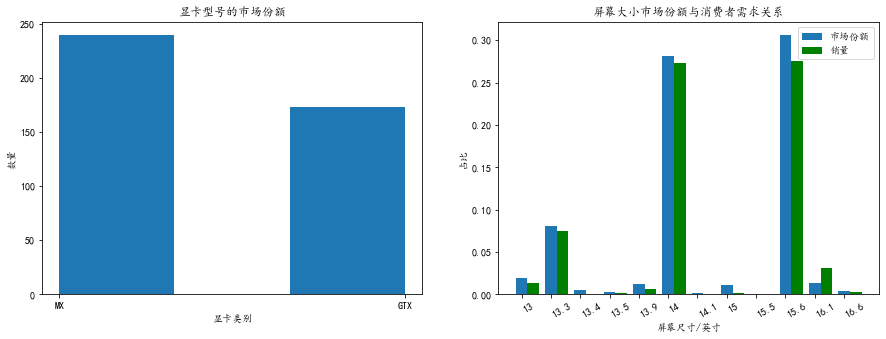

In [358]:
fig,axs=plt.subplots(1,2)
fig.set_size_inches(15,5)
df_display=df
df_display=df_display.replace(' ',np.nan)
df_display1=df_display.dropna(axis=0,subset=['Display'])
data_display=df_display1.dropna(axis=0,subset=['Display'])['Display'].sort_values()
for i in df_display1['Display'].values:
    if "M" in i:
        df_display1['Display']=df_display1['Display'].replace(i,'MX')
    if 'G' in i:
        df_display1['Display']=df_display1['Display'].replace(i,'GTX')
#axs[0].set_xticks(rotation=30, ha='center')
axs[0].hist(x=df_display1['Display'],bins=3,histtype='barstacked')
axs[0].set(title='显卡型号的市场份额',xlabel="显卡类别",ylabel='数量')


df_screen=df
df_screen['Screen size']=df_screen['Screen size'].replace(['715.6','14.0'],['15.6','14'])
df_screen['Screen size']=df_screen['Screen size'].replace(' ',np.nan)
df_screen1=df_screen.dropna(axis=0,subset=['Screen size']).groupby(by=['Screen size']).size()/df_screen.shape[0]
df_screen2=df_screen.dropna(axis=0,subset=['Screen size']).groupby(by=['Screen size'])['Sale'].sum()/df_screen['Sale'].sum()
axs[1].bar(np.arange(12),height=df_screen1[7:-6],label='市场份额',width=0.4)
axs[1].bar(np.arange(12)+0.4,height=df_screen2[7:-6],color='green',label='销量',width=0.4)
axs[1].set_xticks(np.arange(12))
axs[1].set_xticklabels(df_screen1[7:-6].keys(), ha='left',rotation=30)
axs[1].set(title='屏幕大小市场份额与消费者需求关系',xlabel='屏幕尺寸/英寸',ylabel='占比')
axs[1].legend(loc='best')
plt.show()

In [349]:
df.Sale=df.Sale.astype(int)
df_brands=df
df_brands_rank5=df_brands.groupby(by=['Brands']).size().sort_values(ascending=False)[0:10]
df_all_brandsrank=df_brands_rank5.append(pd.Series({"其他":df_brands.groupby(by=['Brands']).size().sort_values(ascending=False)[10:].values.sum()}))

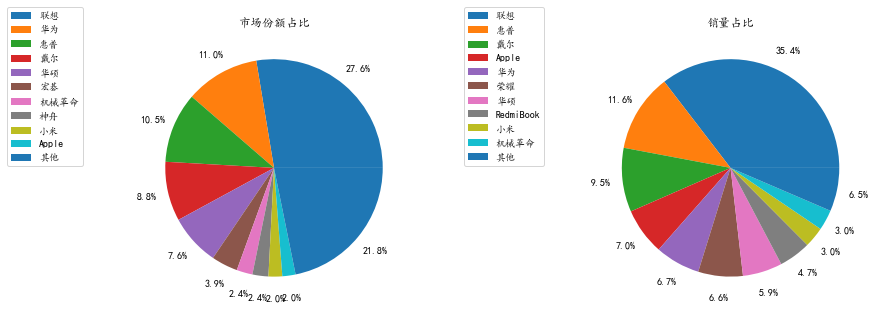

In [359]:
import matplotlib.pyplot as plt
import matplotlib

fig,axs=plt.subplots(1,2)
fig.set_size_inches(15,5)
chinese =matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
axs[0].pie(df_all_brandsrank,autopct='%1.1f%%',pctdistance=1.2,startangle = 0)
axs[0].set(title='市场份额占比')
axs[0].legend(list(df_all_brandsrank.keys()),bbox_to_anchor=(-0.5, 0.8),fontsize='xx-small', loc="center left",prop=chinese)


df_brands=df
axs[1].pie(df_salerank,autopct='%1.1f%%',pctdistance=1.2,startangle = 0)
axs[1].set(title='销量占比')
axs[1].legend(list(df_salerank.keys()),bbox_to_anchor=(-0.5, 0.8),fontsize='xx-small', loc="center left",prop=chinese)

plt.show()

In [360]:
df_brands_rank5=df_brands.groupby(by=['Brands'])
df_brands_sale=df_brands_rank5["Sale"].sum().sort_values(ascending=False)[0:10]
df_salerank=df_brands_sale.append(pd.Series({"其他":df_brands_rank5["Sale"].sum().sort_values(ascending=False)[10:].values.sum()}))

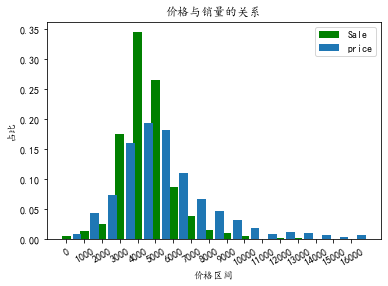

In [361]:
fig=plt.figure()
df_Price=df
df_Sale={}
sale_sum=df_Price['Sale'].sum()
for price in range(0,17000,1000):
    df_Sale[price]=df_Price[(df_Price['Price']>price)&(df_Price['Price']<=price+1000)]['Sale'].sum()/sale_sum
df_Sale1=pd.Series(df_Sale)

legend=['%d' % (i) for i in range(2000,17000,1000)]

df_Price1={}
price_sum=df.shape[0]
for number in range(0,17000,1000):
    df_Price1[number]=df[(df['Price']>number)&(df['Price']<=number+1000)].shape[0]/price_sum
df1=pd.Series(df_Price1)
plt.bar(np.arange(17),height=df_Sale1.values,width=0.5,label="Sale",color='green')
plt.bar(np.arange(17)+0.6,height=df1.values,width=0.5,label='price')
plt.legend(loc='best')
plt.xticks(np.arange(17),range(0,17000,1000), rotation=30, ha='center')
plt.title('价格与销量的关系')
plt.xlabel("价格区间")
plt.ylabel('占比')
plt.show()


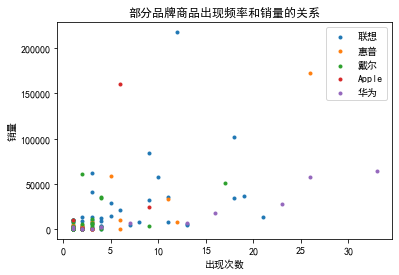

In [363]:
df.Brands=df.Brands.replace('ThinkPad','联想')
df.Brands=df.Brands.replace('扬天','联想')
df.Model=df.Model.replace('翼480','E480')
df.Model=df.Model.replace('翼14','E14')
df.Model=df.Model.replace('翼490','E490')
df.Model=df.Model.replace('小新air14','小新Air14')
df.Model=df.Model.replace('小新AIR14','小新Air14')
df.Model=df.Model.replace('小新pro13','小新Pro13')
df.Model=df.Model.replace('战66三代AMD','战66')
df.Model=df.Model.replace(['惠普HP光影精灵5','暗影精灵5-锋芒毕露-所向披靡赠：电竞三件套+白条3期免息+20'],'光影精灵5')
df.Model=df.Model.replace('惠普HP光影精灵6','光影精灵6')
df.Model=df.Model.replace('光影精灵5Plus','光影精灵5plus')
df.Model=df.Model.replace('星15A','星15')
df.Model=df.Model.replace('星14青春版微窄边框','星14青春版')

plt.rcParams['font.sans-serif']=['SimHei']
group_count_le=df[df['Brands']=='联想'].groupby(by=['Model']).size()
group_sale_le=df[df['Brands']=='联想'].groupby(by=['Model'])['Sale'].sum()
plt.scatter(group_count_le,group_sale_le,marker='.')

          #可见出现次数和销量没有直接关系
group_count_hp=df[df['Brands']=='惠普'].groupby(by=['Model']).size()
group_sale_hp=df[df['Brands']=='惠普'].groupby(by=['Model'])['Sale'].sum()
plt.scatter(group_count_hp,group_sale_hp,marker='.')

group_count_hp=df[df['Brands']=='戴尔'].groupby(by=['Model']).size()
group_sale_hp=df[df['Brands']=='戴尔'].groupby(by=['Model'])['Sale'].sum()
plt.scatter(group_count_hp,group_sale_hp,marker='.')

group_count_hp=df[df['Brands']=='Apple'].groupby(by=['Model']).size()
group_sale_hp=df[df['Brands']=='Apple'].groupby(by=['Model'])['Sale'].sum()
plt.scatter(group_count_hp,group_sale_hp,marker='.')

group_count_hp=df[df['Brands']=='华为'].groupby(by=['Model']).size()
group_sale_hp=df[df['Brands']=='华为'].groupby(by=['Model'])['Sale'].sum()
plt.scatter(group_count_hp,group_sale_hp,marker='.')
plt.legend(['联想','惠普','戴尔','Apple','华为'],loc='best')
plt.title('部分品牌商品出现频率和销量的关系')
plt.xlabel('出现次数')
plt.ylabel('销量')
plt.show()           #可见出现次数和销量没有直接关系


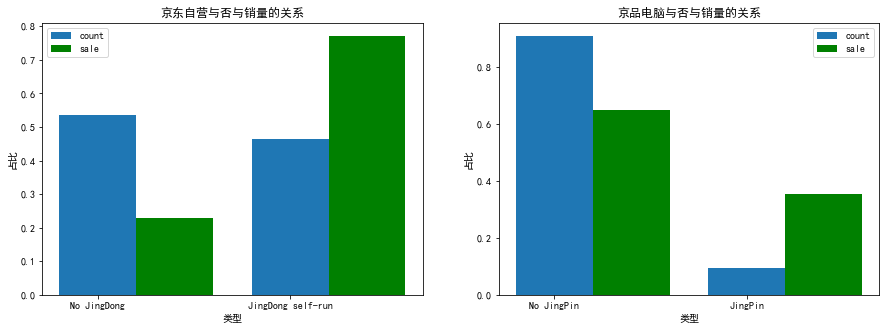

In [364]:
fig,axs=plt.subplots(1,2)
fig.set_size_inches(15,5)
jingdong=df[df['Shop Type']==0].shape
not_jingdong=df[df['Shop Type']==1].shape
chinese =matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
shop_group=df.groupby(by=['Shop Type'])
shop_group_sale=shop_group['Sale'].sum()
axs[0].bar(np.arange(2),shop_group.size()/df.shape[0],width=0.4,label='count')
axs[0].bar(np.arange(2)+0.4,shop_group_sale/df.Sale.sum(),width=0.4,label='sale',color='green')
axs[0].set_xticks(np.arange(2))
axs[0].set_xticklabels(['No JingDong','JingDong self-run'])
axs[0].legend(loc='best',prop=chinese)
axs[0].set(xlabel='类型',title='京东自营与否与销量的关系',ylabel='占比')


jingpin=df[df['JingDong']==0].shape
not_jingdong=df[df['JingDong']==1].shape
jingpin_group=df.groupby(by=['JingDong'])
jingpin_group_sale=jingpin_group['Sale'].sum()
axs[1].bar(np.arange(2),jingpin_group.size()/df.shape[0],width=0.4,label='count')
axs[1].bar(np.arange(2)+0.4,jingpin_group_sale/df.Sale.sum(),width=0.4,label='sale',color='green')
axs[1].set_xticks(np.arange(2))
axs[1].set_xticklabels(['No JingPin','JingPin'])
axs[1].legend(loc='best')
axs[1].set(xlabel='类型',title='京品电脑与否与销量的关系',ylabel='占比')

plt.show()      #对京东的信赖程度更高

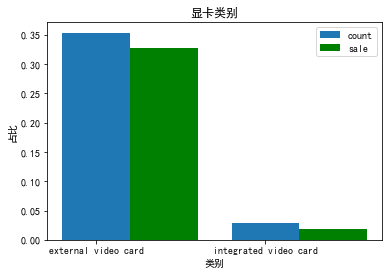

In [365]:
displayer_group=df.groupby(by=['Display_type'])
displayer_group_sale=displayer_group['Sale'].sum()
plt.bar(np.arange(2),displayer_group.size().drop([0])/df.shape[0],width=0.4,label='count')
plt.bar(np.arange(2)+0.4,displayer_group_sale.drop([0])/df.Sale.sum(),width=0.4,label='sale',color='green')
plt.xticks(np.arange(2),['external video card','integrated video card'])
plt.legend(loc='best')
plt.title('显卡类别')
plt.xlabel('类别')
plt.ylabel('占比')
plt.show()      #对独显更倾向，但是差距没有特别大

In [356]:
df.to_csv('summary2.0.csv',index=False,mode='w')

In [30]:
import re
with open('kkkkkkk.txt','r',encoding='utf-8') as f:
    m1=list(set(f.read().split(',')))
m1.remove('')
m1=[int(i) for i in m1[1::]]
k1=df.iloc[m1,-9]
n1=[]
for i in k1.values:
    s1=re.search(r'[0-9]+',i).group()
    n1.append(s1)
id2=list(set(n1))
df2=df.iloc[m1,:]
df2.to_csv('x.csv',encoding='utf_8_sig')

In [ ]:
from time import sleep 
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions
from selenium.webdriver.common.action_chains import ActionChains

option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
driver = Chrome(options=option)
text = []
for href in id1:
    try:
        sleep(5)
        for i in range(5):
            sleep(7)
            driver.get('https://club.jd.com/comment/skuProductPageComments.action?callback=fetchJSON_comment98&productId=' + href + '&score=1&sortType=5&page=' + str(i) + '&pageSize=10&isShadowSku=0&fold=1')
            if 'content' not in driver.page_source:
                break
            f=open("x4.txt","a",encoding="utf-8")
            f.write(driver.page_source)
            f.write("------")
        f.write('      ok       ')
    except:
        f=open("x4.txt","a",encoding="utf-8")
        f.write(' ')
        f.write("------")
        f.write('      ok      ')
        f.close()